# Hypothesis Testing

From lecture, we know that hypothesis testing is a critical tool in determing what the value of a parameter could be.

We know that the basis of our testing has two attributes:

**Null Hypothesis: $H_0$**

**Alternative Hypothesis: $H_a$**

The tests we have discussed in lecture are:

* One Population Proportion
* Difference in Population Proportions
* One Population Mean
* Difference in Population Means

In this tutorial, I will introduce some functions that are extremely useful when calculating a t-statistic and p-value for a hypothesis test.

Let's quickly review the following ways to calculate a test statistic for the tests listed above.

The equation is:

$$\frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}$$ 

We will use the examples from our lectures and use python functions to streamline our tests.

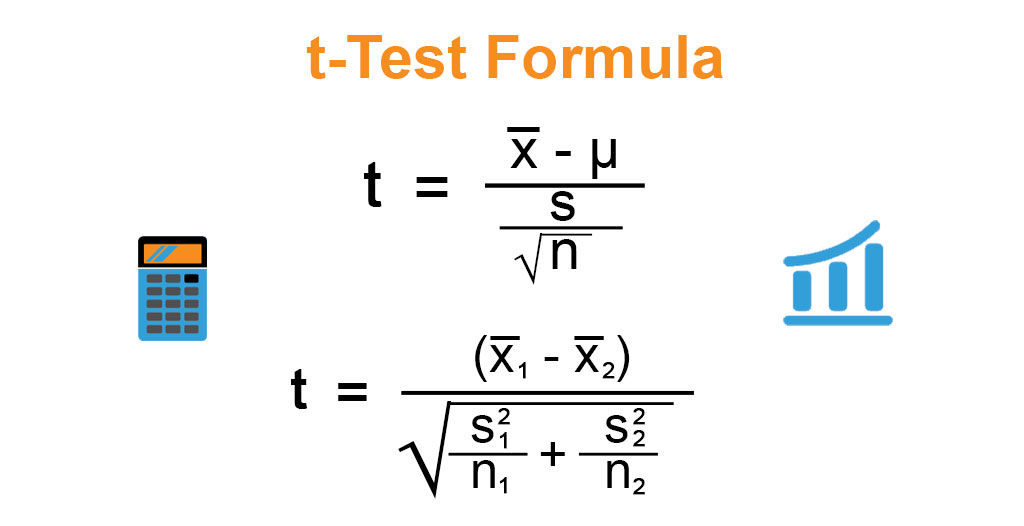
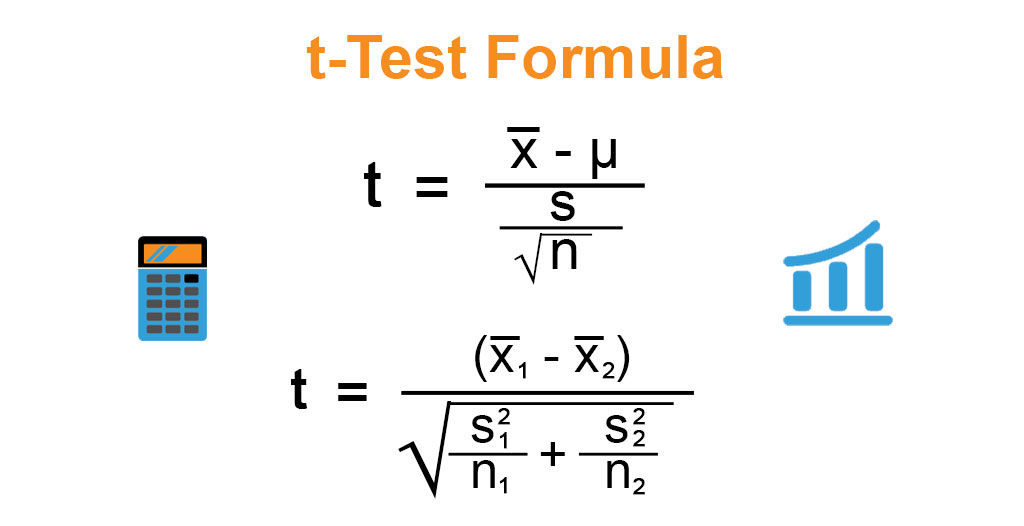
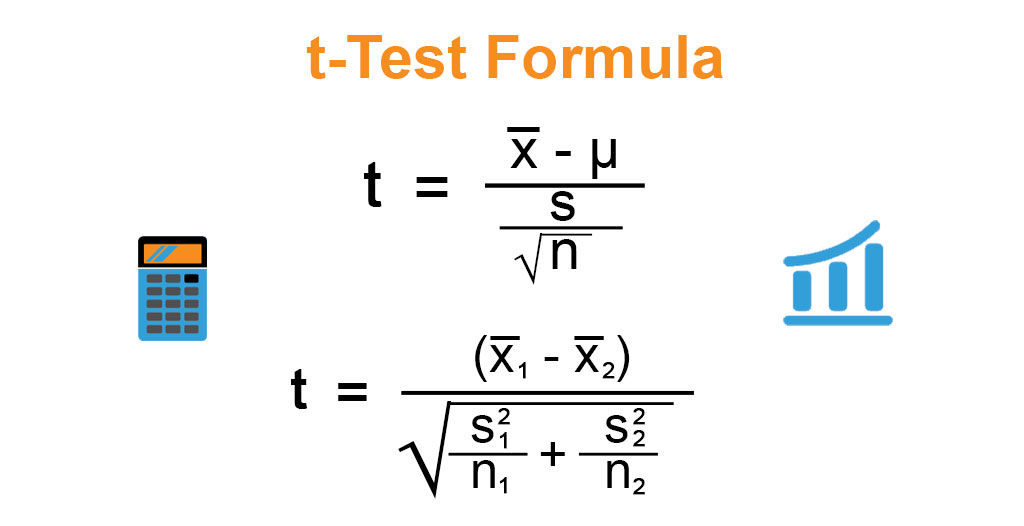

In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import scipy.stats.distributions as dist

---
### One Population Proportion

#### Research Question 

In previous years 52% of parents believed that electronics and social media was the cause of their teenager’s lack of sleep. Do more parents today believe that their teenager’s lack of sleep is caused due to electronics and social media? 

**Population**: Parents with a teenager (age 13-18)  
**Parameter of Interest**: p  
**Null Hypothesis:** p = 0.52  
**Alternative Hypthosis:** p > 0.52 (note that this is a one-sided test)

1018 Parents

56% believe that their teenager’s lack of sleep is caused due to electronics and social media.

###  `sm.stats.proportions_ztest` function in the statsmodels library:

```python
sm.stats.proportions_ztest(count, 
                           nobs, 
                           value=None, 
                           alternative='two-sided', 
                           prop_var=False)
```

Parameters:
- `count`: The number of successes in the sample(s).
- `nobs`: The total number of observations in the sample(s).
- `value` (optional): The value of the proportion under the null hypothesis. If not provided, the proportion in the sample is used.
- `alternative` (default: 'two-sided'): The alternative hypothesis, which can be 'two-sided', 'smaller', or 'larger'.
- `prop_var` (default: False): If True, the variance of the proportion is computed under the assumption that the null hypothesis value is true. If False, the variance is computed using the sample proportion.

Returns:
- `statistic`: The test statistic.
- `pvalue`: The p-value of the test.

Remember to import the necessary libraries (`numpy` and `statsmodels.api`) before using the `sm.stats.proportions_ztest` function.

In [8]:
n = 1018
pnull = .52
p_hat = .56 # p-hat represents the sample proportion
z_stat, p_value = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger', prop_var=0.52)

In [21]:
# Round the result
rounded_z_stat = round(z_stat, 2)
rounded_p_value = np.round(p_value, 4)

# Print the rounded result
print("Rounded z-statistic:", rounded_z_stat)
print("\nRounded p-value:", rounded_p_value)

Rounded z-statistic: 2.55

Rounded p-value: 0.0053


##### Conclusion
- **z-statistic: 2.55** →  That means that our observed sample proportion is 2.55 null standard errors above our hypothesized population proportion

- **p-value = 0.0053 < 𝛂 = 0.05** → Reject the null hypothesis (H0: p = 0.52) 

There is sufficient evidence to conclude that the population proportion of parents with a teenager who believe that electronics and social media is the cause for lack of sleep is greater than 52%.

---
### Difference in Population Proportions

#### Research Question

Is there a significant difference between the population proportions of parents of black children and parents of Hispanic children who report that their child has had some swimming lessons?

**Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
**Parameter of Interest**: p1 - p2, where p1 = black and p2 = hispanic  
**Null Hypothesis:** p1 - p2 = 0  
**Alternative Hypthosis:** p1 - p2 $\neq$ = 0  


91 out of 247 (36.8%) sampled parents of black children report that their child has had some swimming lessons.

120 out of 308 (38.9%) sampled parents of Hispanic children report that their child has had some swimming lessons.

In [22]:
import numpy as np
from scipy.stats import norm

# Sample sizes
n1 = 247
n2 = 308

# Number of parents reporting that their child had some swimming lessons
y1 = 91
y2 = 120

# Estimates of the population proportions
p1 = round(y1 / n1, 2)
p2 = round(y2 / n2, 2)

# Estimate of the combined population proportion
p_hat = (y1 + y2) / (n1 + n2)

# Estimate of the variance of the combined population proportion
var = p_hat * (1 - p_hat)

# Estimate of the standard error of the combined population proportion
se = np.sqrt(var * (1 / n1 + 1 / n2))

# Test statistic and its p-value
test_stat = (p1 - p2) / se
pvalue = 2 * norm.cdf(-np.abs(test_stat))

# Print the test statistic and its p-value
print("Test Statistic:", round(test_stat, 2))
print("\nP-Value:", round(pvalue, 4))

Test Statistic: -0.48

P-Value: 0.6295


##### Conclusion
- **Test Statistic: -0.48** → That means that our observed difference in sample proportions is 0.48 estimated standard errors below our hypothesized mean of equal population proportions.
- **p-val = 0.6295 > 0.10 = 𝛂** → fail to reject null hypothesis → don’t have evidence against equal population proportions 

Formally, based on our sample and our p-value, we fail to reject the null hypothesis. We conclude that there is no significant difference between the population proportion of parents of black and Hispanic children who report their child has had swimming lessons.

---
### One Population Mean

#### Research Question 

Is the average cartwheel distance (in inches) for adults 
more than 80 inches?

**Population**: All adults<br>
**Parameter of Interest**: $\mu$, population mean cartwheel distance.<br>
**Null Hypothesis:** $\mu$ = 80<br>
**Alternative Hypthosis:** $\mu$ > 80<br>

25 Adults

$\mu = 82.46$

$\sigma = 15.06$

### `sm.stats.ztest`() function in the statsmodels library:
```python
sm.stats.ztest(x1, 
               x2=None, 
               value=0, 
               alternative='two-sided', 
               usevar='pooled', 
               ddof=1.0)
```

Parameters:
- `x1`: The sample data or array-like object for the first group.
- `x2` (optional): The sample data or array-like object for the second group. If not provided, a one-sample z-test is performed.
- `value` (default: 0): The value of the population mean under the null hypothesis.
- `alternative` (default: 'two-sided'): The alternative hypothesis, which can be 'two-sided', 'smaller', or 'larger'.
- `usevar` (default: 'pooled'): Specifies how to compute the standard deviation of the sample(s). Options are 'pooled', 'unequal', or 'equal'.
- `ddof` (default: 1.0): The degrees of freedom adjustment for the standard deviation.

Returns:
- `statistic`: The test statistic.
- `pvalue`: The p-value of the test.

Remember to import the necessary libraries (`numpy` and `statsmodels.api`) before using the `sm.stats.ztest` function.

In [24]:
df = pd.read_csv("Cartwheeldata.csv")
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [25]:
n = len(df)
mean = df["CWDistance"].mean()
sd = df["CWDistance"].std()
(n, mean, sd)

(25, 82.48, 15.058552387264852)

In [27]:
z_stat, p_value = sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

# Round the result
rounded_z_stat = round(z_stat, 2)
rounded_p_value = np.round(p_value, 4)

# Print the rounded result
print("Rounded z-statistic:", rounded_z_stat)
print("\nRounded p-value:", rounded_p_value)

Rounded z-statistic: 0.82

Rounded p-value: 0.2051


##### Conclusion
- **z-statistic: 0.82** → Our sample mean is only 0.82 (estimated) standard errors above null value of 80 inches
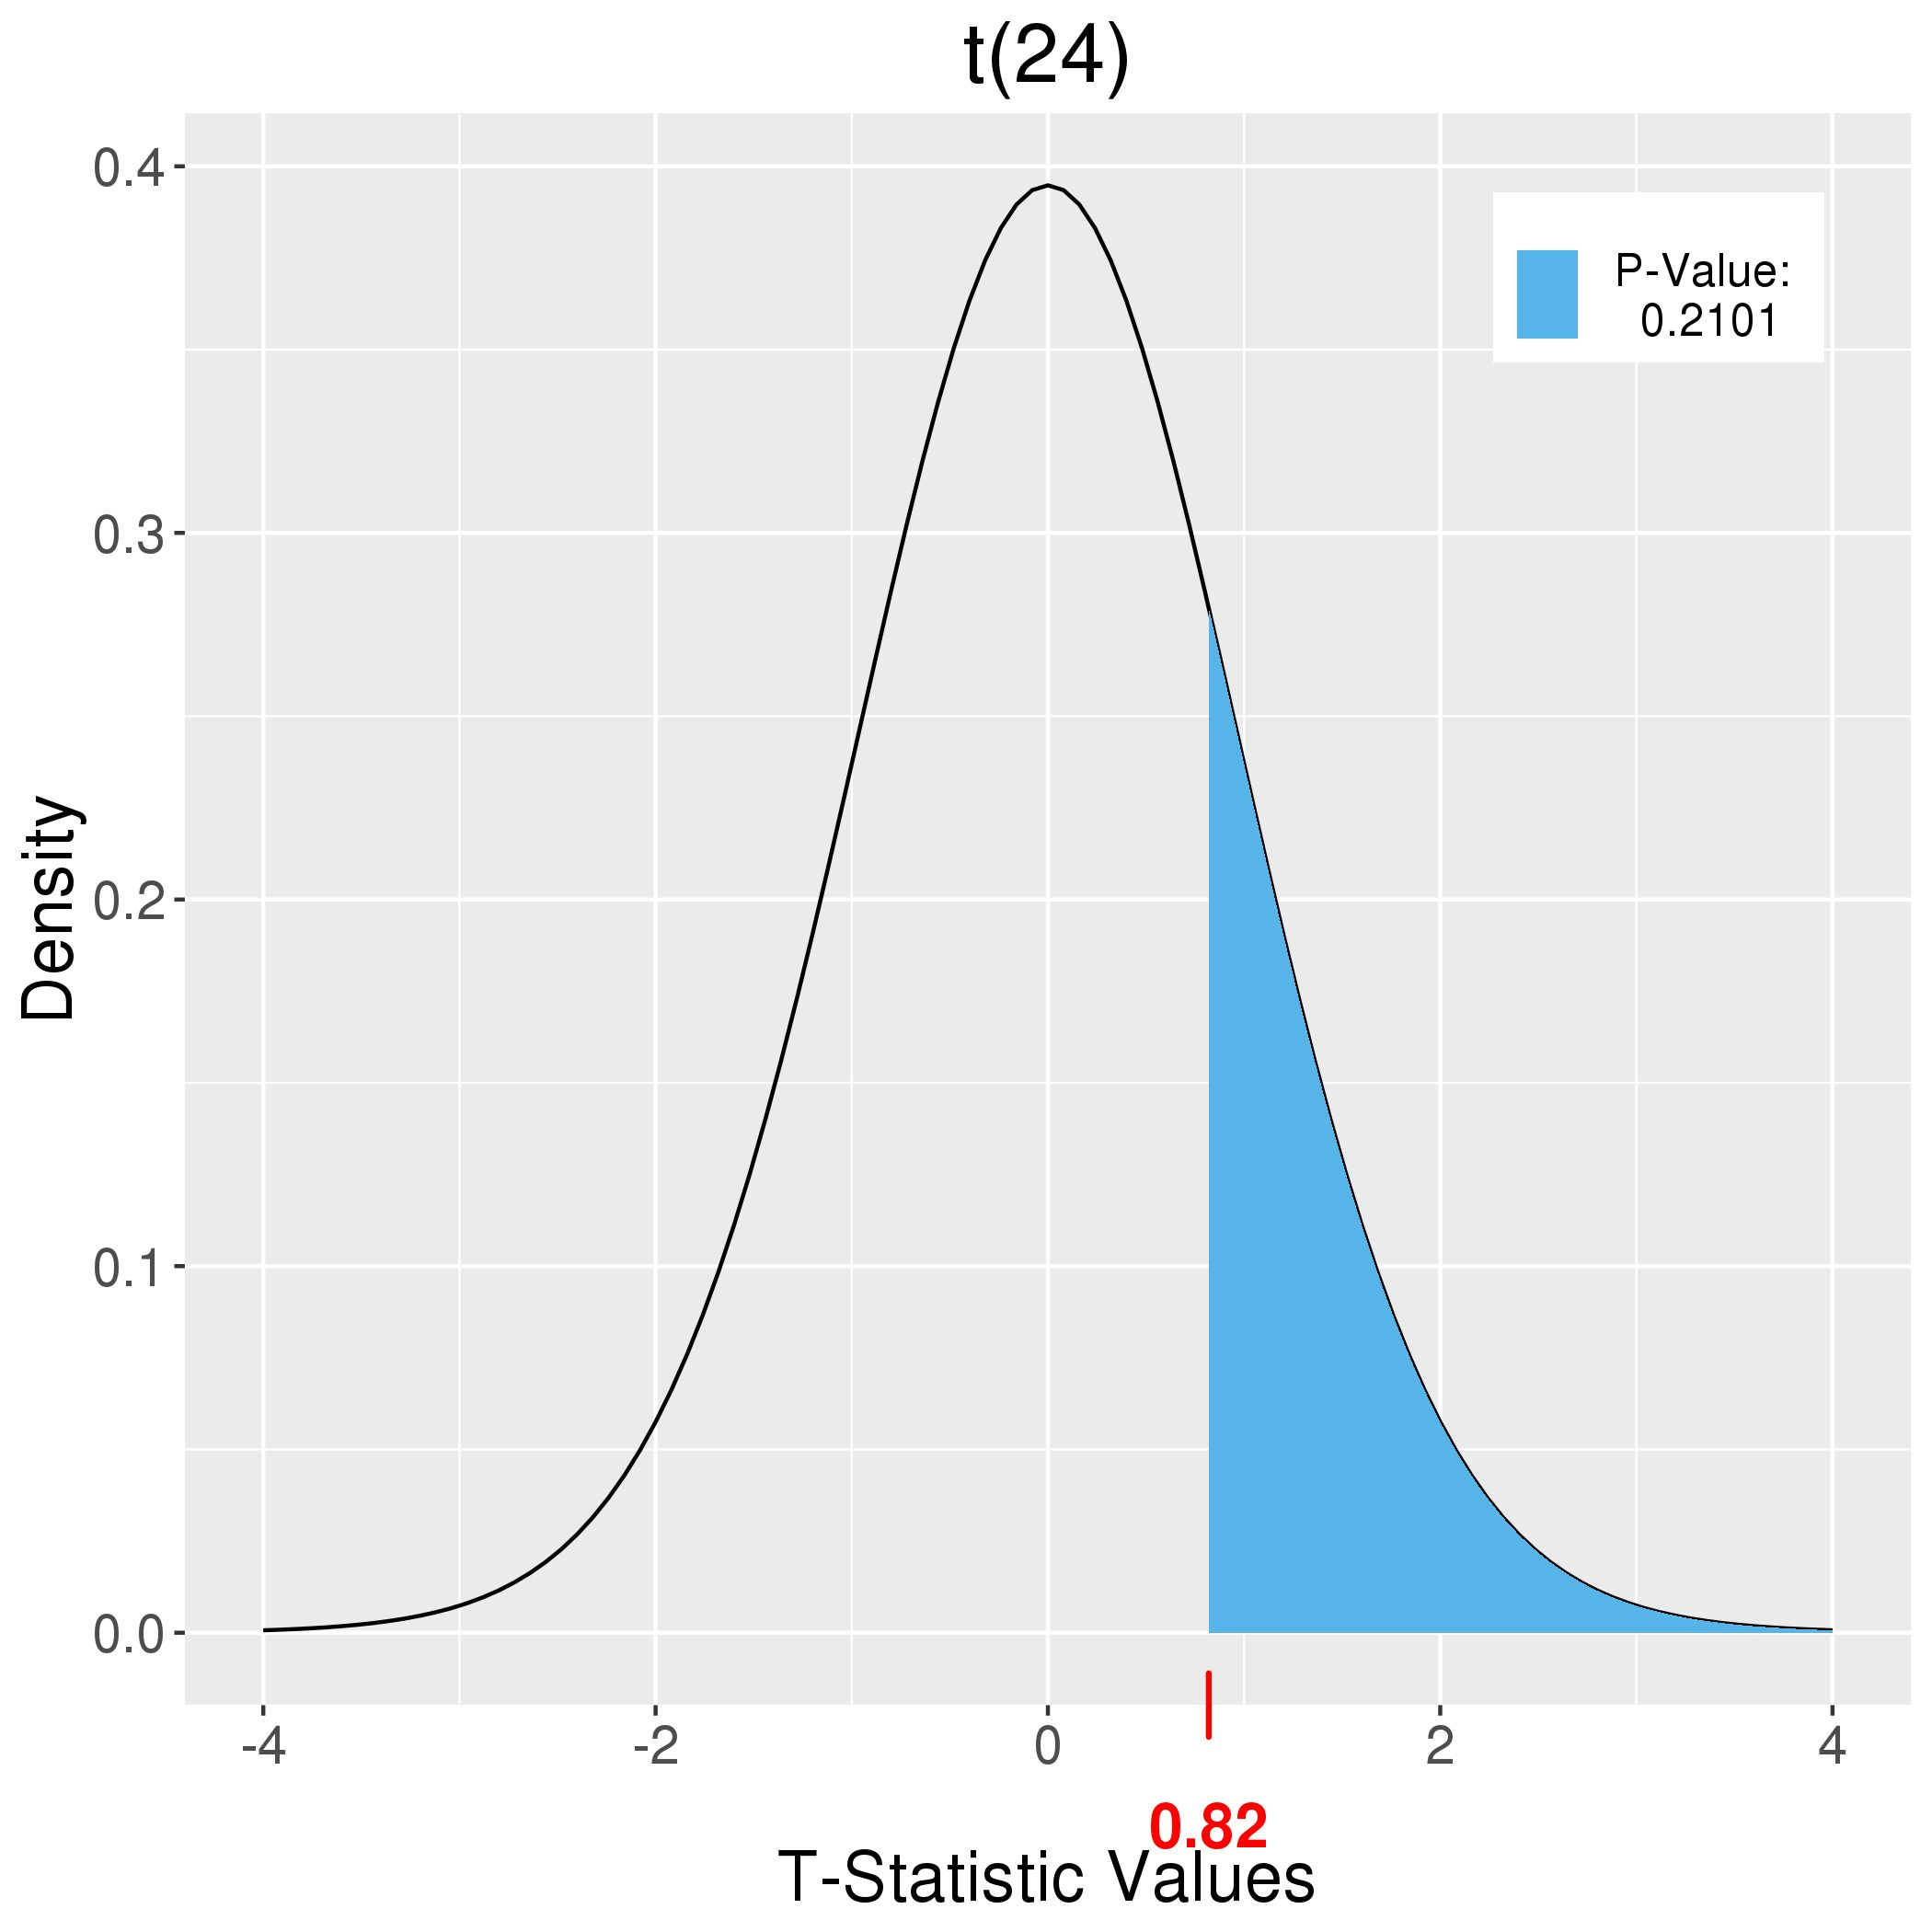

- **p-value: 0.2051 > 𝛂 = 0.05** → we fail to reject the null!

Based on estimated mean (82.48 inches), we cannot support the population mean CW distance is greater than 80 inches

---
### Difference in Population Means

#### Research Question 

Considering adults in the NHANES data, do males have a significantly higher mean Body Mass Index than females?

**Population**: Adults in the NHANES data.  
**Parameter of Interest**: $\mu_1 - \mu_2$, Body Mass Index.  
**Null Hypothesis:** $\mu_1 = \mu_2$  
**Alternative Hypthosis:** $\mu_1 \neq \mu_2$

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$

##### Conduct the z-test
```python 
z_statistic, p_value = ztest(group1, group2)```

##### Print the test statistic and p-value
```python 
print("Z-Statistic:", z_statistic)
print("P-Value:", p_value)```

You need to provide two arrays or lists (group1 and group2) that contain the data for the two groups you want to compare. The ztest function will calculate the z-statistic and the p-value for the comparison.

In [28]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [49]:
females = da[da["RIAGENDR"] == 2]
males = da[da["RIAGENDR"] == 1]

In [50]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.93994565217392, 7.753318809545674)

In [51]:
n2 = len(male)
mu2 = males["BMXBMI"].mean()
sd2 = males["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846942, 6.2525676168014614)

In [52]:
z_statistic, p_value = sm.stats.ztest(females["BMXBMI"].dropna(), males["BMXBMI"].dropna())

print("Z-Statistic:", z_statistic.round(2))
print("P-Value:", p_value.round(4))

Z-Statistic: 6.18
P-Value: 0.0


- **p-value = 0.0001** → This means that there is a less than 0.1% chance of observing a difference in mean BMI between males and females as large as or larger than the one observed if the null hypothesis were true. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in mean BMI between males and females.

In [58]:
from scipy import stats

# Sample data
n1 = 2976  # Number of females
n2 = 2759  # Number of males

x1 = 29.94  # Mean BMI for females
x2 = 28.78  # Mean BMI for males

s1 = 7.75   # Standard deviation for females
s2 = 6.25   # Standard deviation for males

# Calculate the standard error of the difference between the means
se = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)

# Calculate the t-statistic
t = (x1 - x2) / se

# Calculate the degrees of freedom
df = n1 + n2 - 2

# Calculate the p-value
p = 2 * stats.t.sf(np.abs(t), df)

# Print the results
print(f"t-statistic: {t:.4f}")
print(f"p-value: {p:.4f}")

t-statistic: 6.2597
p-value: 0.0000
